<a href="https://colab.research.google.com/github/Siddarthan999/DS-MINI-PROJECT/blob/main/DS_MP2_(IMP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("/content/drive/MyDrive/Data Science DataSets/GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv")

In [36]:
print(df.head())

           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland


In [37]:
data = df.assign(Duplicate_Country=df["Country"])

In [38]:
print(data.head())

           dt  AverageTemperature  AverageTemperatureUncertainty Country  \
0  1743-11-01               4.384                          2.294   Åland   
1  1743-12-01                 NaN                            NaN   Åland   
2  1744-01-01                 NaN                            NaN   Åland   
3  1744-02-01                 NaN                            NaN   Åland   
4  1744-03-01                 NaN                            NaN   Åland   

  Duplicate_Country  
0             Åland  
1             Åland  
2             Åland  
3             Åland  
4             Åland  


In [39]:
print(data.tail())

                dt  AverageTemperature  AverageTemperatureUncertainty  \
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country Duplicate_Country  
577457  Zimbabwe          Zimbabwe  
577458  Zimbabwe          Zimbabwe  
577459  Zimbabwe          Zimbabwe  
577460  Zimbabwe          Zimbabwe  
577461  Zimbabwe          Zimbabwe  


In [40]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
 4   Duplicate_Country              577462 non-null  object 
dtypes: float64(2), object(3)
memory usage: 22.0+ MB
None


In [41]:
print(data.nunique())

dt                                3239
AverageTemperature               71085
AverageTemperatureUncertainty     8979
Country                            243
Duplicate_Country                  243
dtype: int64


In [42]:
print((data.isnull().sum()/(len(data)))*100)

dt                               0.000000
AverageTemperature               5.654225
AverageTemperatureUncertainty    5.526251
Country                          0.000000
Duplicate_Country                0.000000
dtype: float64


In [43]:
data.interpolate(method ='linear', limit_direction ='backward', inplace=True)

In [44]:
data.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [45]:
data['dt'] = pd.to_datetime(data['dt'])
data['year'] = data['dt'].dt.year
data['month'] = data['dt'].dt.month

In [46]:
bins = [1700, 1800, 1900, 2000, 2014]
labels = ['18th century', '19th century', '20th century', '21st century']
data['year_category'] = pd.cut(data['year'], bins=bins, labels=labels, right=False)

In [47]:
average_temp = data['AverageTemperature']

In [48]:
mean = average_temp.mean()
std_dev = average_temp.std()

In [49]:
threshold = 3
outliers = average_temp[(average_temp - mean).abs() > threshold * std_dev]

In [50]:
data_no_outliers = data[~data['AverageTemperature'].isin(outliers)]

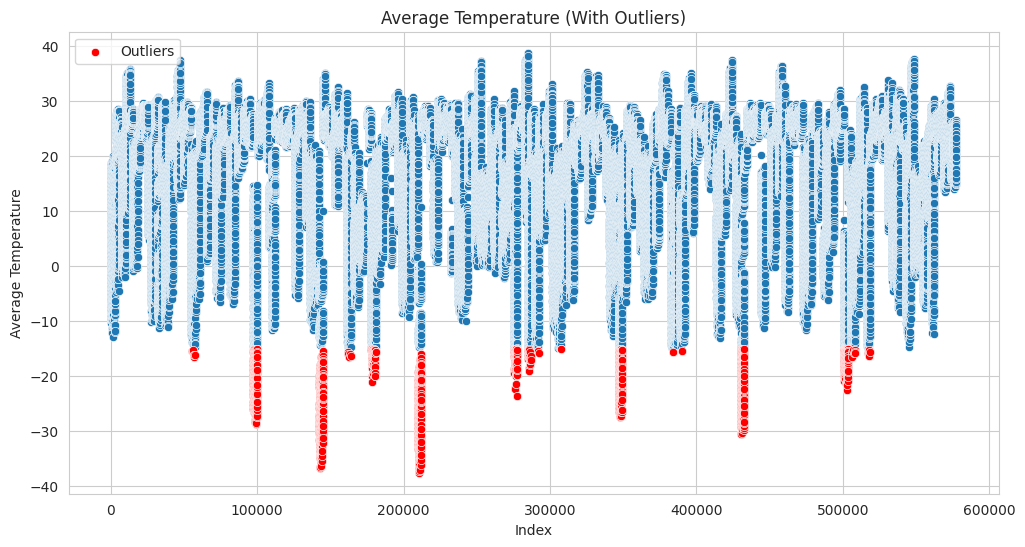

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x=data.index, y='AverageTemperature')
sns.scatterplot(data=data.loc[outliers.index], x=outliers.index, y='AverageTemperature', color='red', label='Outliers')
plt.title("Average Temperature (With Outliers)")
plt.xlabel("Index")
plt.ylabel("Average Temperature")
plt.legend()
plt.show()

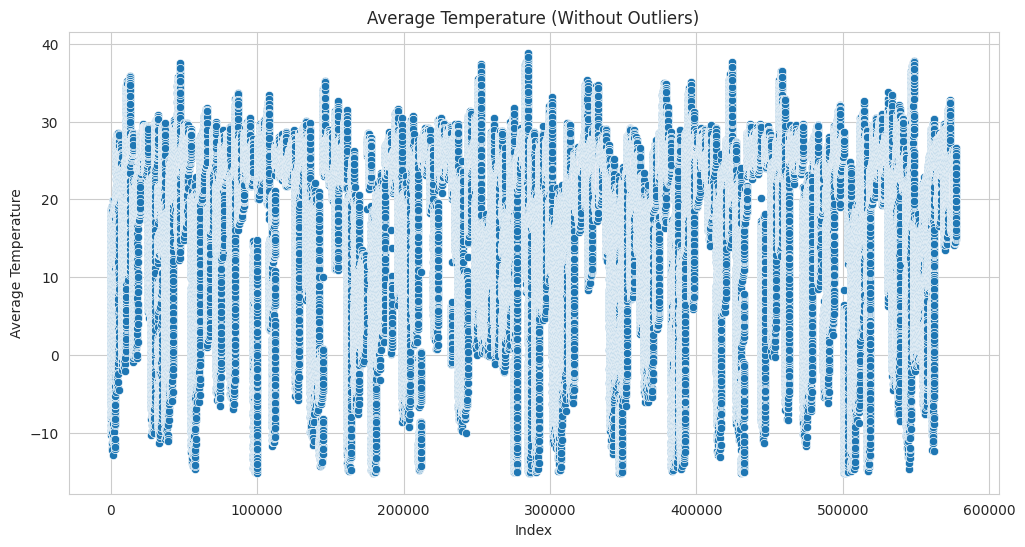

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_no_outliers, x=data_no_outliers.index, y='AverageTemperature')
plt.title("Average Temperature (Without Outliers)")
plt.xlabel("Index")
plt.ylabel("Average Temperature")
plt.show()

In [53]:
data = data_no_outliers

In [54]:
data_encoded = pd.get_dummies(data, columns=data.select_dtypes(include='object').columns.difference(['Duplicate_Country']))

In [55]:
data_encoded.to_csv("cleaned2_data.csv", index=False)

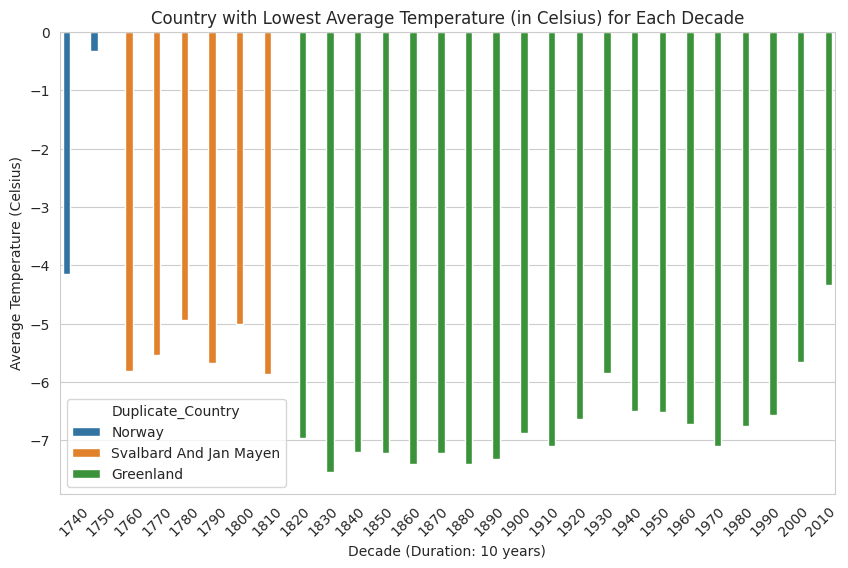

In [56]:
# Load the dataset
data = pd.read_csv("/content/cleaned2_data.csv")

# Convert the "dt" column to datetime format
data['dt'] = pd.to_datetime(data['dt'])

# Extract the decade from the "dt" column
data['decade'] = data['dt'].dt.year // 10 * 10

# Calculate the average temperature per country and decade
avg_temp = data.groupby(['decade', 'Duplicate_Country'])['AverageTemperature'].mean().reset_index()

# Find the country with the lowest average temperature for each decade
min_temp_per_decade = avg_temp.groupby('decade')['AverageTemperature'].idxmin()
countries_lowest_temp_decade = avg_temp.loc[min_temp_per_decade, ['decade', 'Duplicate_Country', 'AverageTemperature']]

# Visualize the countries with the lowest average temperature for each decade
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=countries_lowest_temp_decade, x='decade', y='AverageTemperature', hue='Duplicate_Country')
plt.title("Country with Lowest Average Temperature (in Celsius) for Each Decade")
plt.xlabel("Decade (Duration: 10 years)")
plt.ylabel("Average Temperature (Celsius)")
plt.xticks(rotation=45)
plt.show()

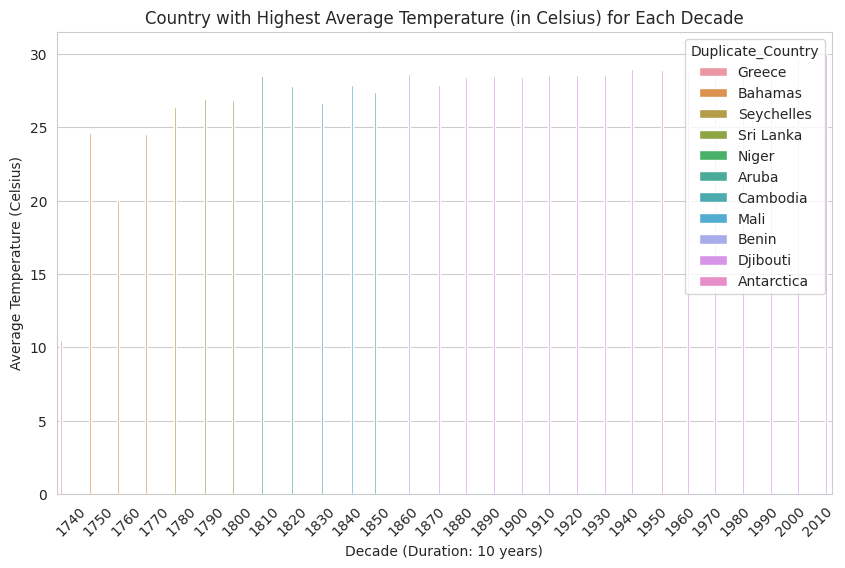

In [57]:
# Find the country with the highest average temperature for each decade
max_temp_per_decade = avg_temp.groupby('decade')['AverageTemperature'].idxmax()
countries_highest_temp = avg_temp.loc[max_temp_per_decade, ['decade', 'Duplicate_Country', 'AverageTemperature']]

# Visualize the countries with the highest average temperature for each decade
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=countries_highest_temp, x='decade', y='AverageTemperature', hue='Duplicate_Country')
plt.title("Country with Highest Average Temperature (in Celsius) for Each Decade")
plt.xlabel("Decade (Duration: 10 years)")
plt.ylabel("Average Temperature (Celsius)")
plt.xticks(rotation=45)
plt.show()

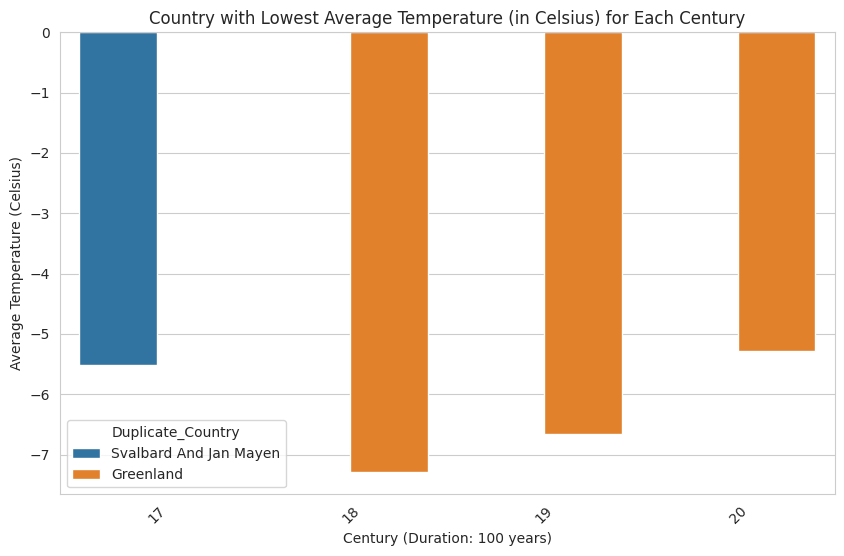

In [58]:
# Extract the century from the "dt" column
data['century'] = data['dt'].dt.year // 100

# Calculate the average temperature per country and century
avg_temp = data.groupby(['century', 'Duplicate_Country'])['AverageTemperature'].mean().reset_index()

# Find the country with the lowest average temperature for each century
min_temp_per_century = avg_temp.groupby('century')['AverageTemperature'].idxmin()
countries_lowest_temp_century = avg_temp.loc[min_temp_per_century, ['century', 'Duplicate_Country', 'AverageTemperature']]

# Visualize the countries with the lowest average temperature for each century
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=countries_lowest_temp_century, x='century', y='AverageTemperature', hue='Duplicate_Country')
plt.title("Country with Lowest Average Temperature (in Celsius) for Each Century")
plt.xlabel("Century (Duration: 100 years)")
plt.ylabel("Average Temperature (Celsius)")
plt.xticks(rotation=45)
plt.show()

     century Duplicate_Country  AverageTemperature
64        17         Sri Lanka           26.929646
135       18          Djibouti           27.817976
374       19          Djibouti           28.759915
617       20          Djibouti           29.770206


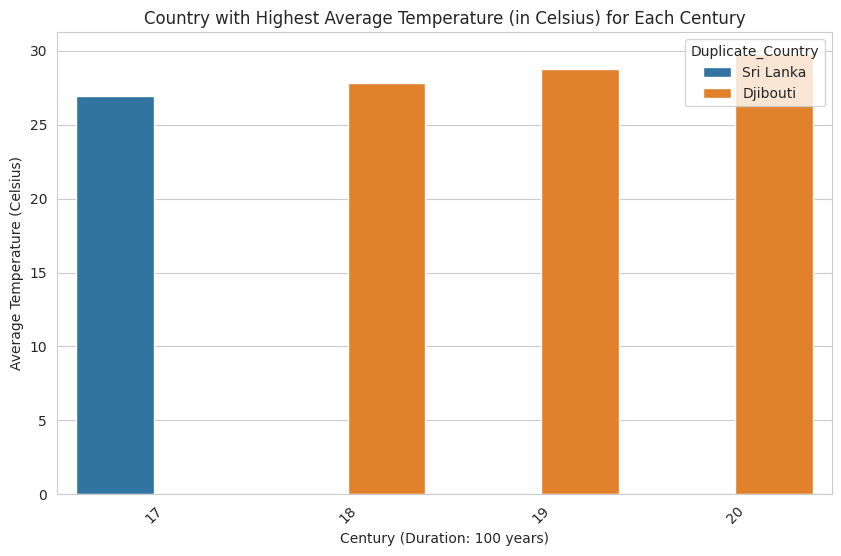

In [59]:
# Find the country with the highest average temperature for each century
max_temp_per_century = avg_temp.groupby('century')['AverageTemperature'].idxmax()
countries_highest_temp = avg_temp.loc[max_temp_per_century, ['century', 'Duplicate_Country', 'AverageTemperature']]

# Print the countries with the highest average temperature for each century
print(countries_highest_temp)

# Visualize the countries with the highest average temperature for each century
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=countries_highest_temp, x='century', y='AverageTemperature', hue='Duplicate_Country')
plt.title("Country with Highest Average Temperature (in Celsius) for Each Century")
plt.xlabel("Century (Duration: 100 years)")
plt.ylabel("Average Temperature (Celsius)")
plt.xticks(rotation=45)
plt.show()

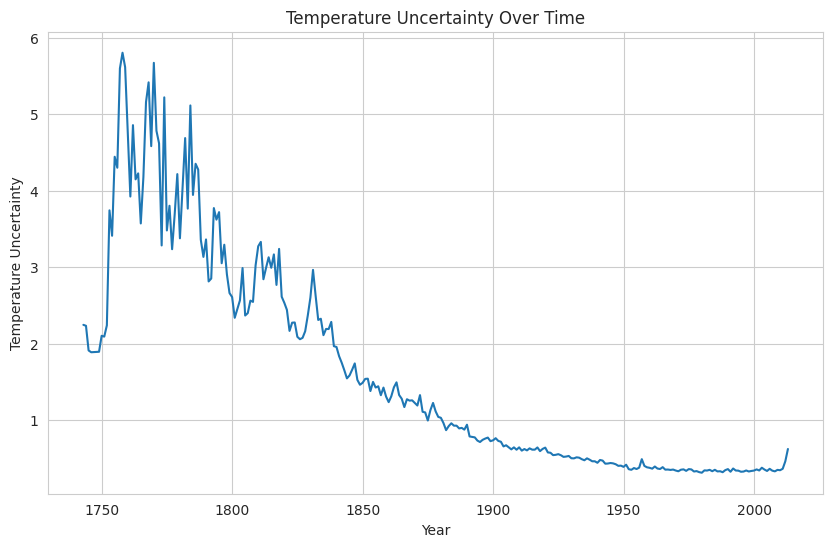

In [60]:
# Calculate the average temperature uncertainty over time
temp_uncertainty = data.groupby(data['dt'].dt.year)['AverageTemperatureUncertainty'].mean()

# Plot the temperature uncertainty over time
plt.figure(figsize=(10, 6))
plt.plot(temp_uncertainty.index, temp_uncertainty.values)
plt.title("Temperature Uncertainty Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Uncertainty")
plt.show()

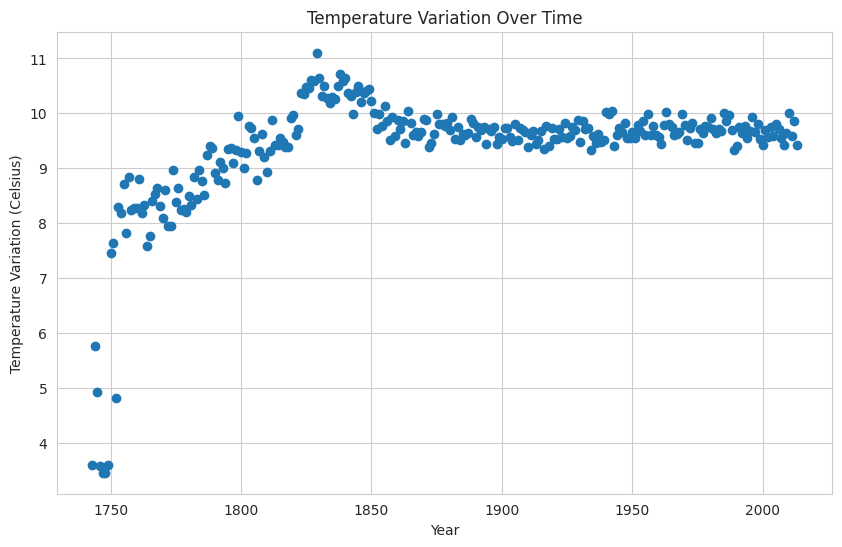

In [61]:
# Calculate the temperature variation (standard deviation) over time
temp_variation = data.groupby(data['dt'].dt.year)['AverageTemperature'].std()

# Create a scatter plot for temperature variation over time
plt.figure(figsize=(10, 6))
plt.scatter(temp_variation.index, temp_variation.values)
plt.title("Temperature Variation Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Variation (Celsius)")
plt.show()

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

<ipython-input-63-b1f4b07a349e>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_encoded = data_encoded.resample('Y').mean()  # Resample data to yearly average


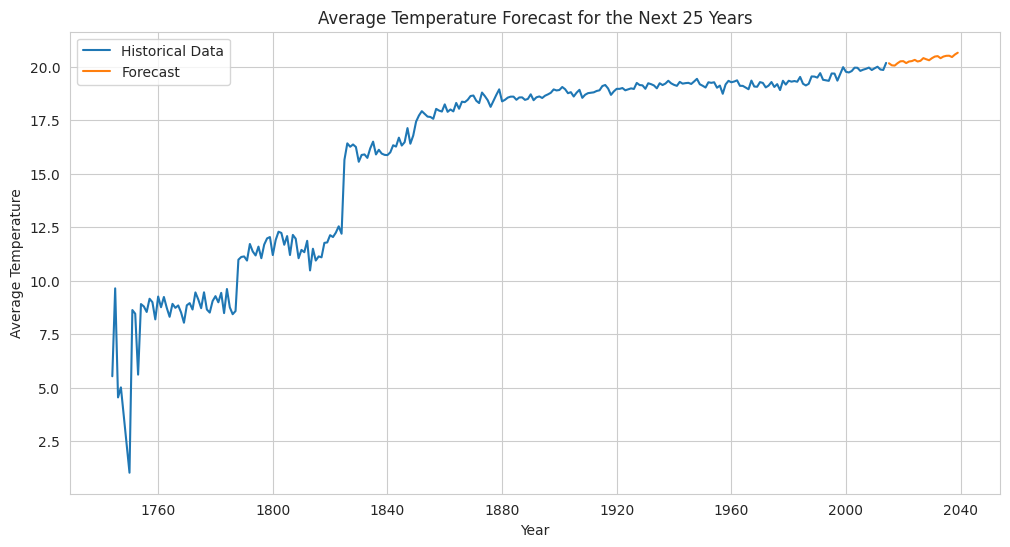

RMSE: 1.2054144092168757


In [63]:
# Load the encoded dataset
data_encoded = pd.read_csv("/content/cleaned2_data.csv")

# Prepare the data for time series forecasting
data_encoded['dt'] = pd.to_datetime(data_encoded['dt'])
data_encoded = data_encoded.set_index('dt')
data_encoded = data_encoded.resample('Y').mean()  # Resample data to yearly average
data_encoded = data_encoded['1743':'2013']  # Filter data up to 2013

# Drop rows with missing values
data_encoded.dropna(inplace=True)

# Train the SARIMA model
model = SARIMAX(data_encoded['AverageTemperature'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Make predictions for the historical data
historical_predictions = model_fit.predict(start=data_encoded.index[0], end=data_encoded.index[-1])

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(data_encoded['AverageTemperature'], historical_predictions, squared=False)

# Make predictions for the next 25 years
future_dates = pd.date_range(start='2014-01-01', periods=25, freq='Y')
forecast = model_fit.predict(start=len(data_encoded), end=len(data_encoded) + 24)

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data_encoded.index, data_encoded['AverageTemperature'], label='Historical Data')
plt.plot(future_dates, forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Forecast for the Next 25 Years')
plt.legend()
plt.show()

print(f"RMSE: {rmse}")